# Estadística descriptiva

La **estadística descriptiva** corresponde a los métodos numéricos y gráficos que nos permiten resumir, describir y visualizar nuestros datos

También se suele llamar **análisis exploratorio de datos** y es clave para

- Obtener información básica y resumida de nuestras variables
- Descubrir patrones en nuestros datos
- Detectar la presencia de outliers (valores fuera de rango)
- Seleccionar de manera informada los métodos inferenciales que utilizaremos 

entre otros. El objetivo es describir nuestros datos para mejorar nuestro entendimiento de los mismos

En esta lección veremos algunas funciones de `matplotlib`, `numpy` y `scipy.stats` para realizar estadística descriptiva 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

## Histogramas

El histograma es una representación aproximada de la **distribución de probabilidad** de una variable

Asumiendo que tenemos un vector con realizaciones de una variable aleatoria

$$
[x_1, x_2, \ldots, x_N] \sim X
$$

podemos construir un histograma en tres pasos

1. Establecer un rango mínimo y máximo
1. Dividir el rango en **cajones/bines**
1. Medir la frecuencia relativa en cada cajón, es decir la cantidad de $x_i$ que caen en dicho cajón divido $N$


**Ejemplo:** Para construir el siguiente histograma se utilizaron $7$ bines de tamaño $1$ regularmente distribuidos en el rango $[-3, 4]$

<img src="img/stats4.png">


El ejemplo anterior corresponde al caso particular más común donde **los cajones son disjuntos y de igual tamaño**. En dicho caso los cajones se definen completamente con

- el rango del histograma: Comienzo del primer bin y termino del último bin
- la cantidad de bines: En conjunto con el rango especifican el tamaño de los bines


**Histograma con Matplotlib**

Consideremos el siguiente dataset con expectativa de vida, población y PIB per cápita por país al año 2007

In [2]:
df = pd.read_csv('data/gapminder.csv', index_col=2).loc[2007].set_index("country")
df.head()

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.828,31889923,974.580338
Albania,Europe,76.423,3600523,5937.029526
Algeria,Africa,72.301,33333216,6223.367465
Angola,Africa,42.731,12420476,4797.231267
Argentina,Americas,75.320,40301927,12779.379640


La función [`hist`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) de matplotlib nos retorna el histograma y además lo gráfica. Sus principales argumentos "funcionales" son:

- Un `ndarray` unidimensional
- `bins`: La cantidad de cajones 
- `range`: Una tupla  con el límite mínimo y máximo del histograma
- `density`: Un booleano para especificar si se retorna la frecuencia relativa o absoluta
- `cumulative`: Un booleano para especificar si se retorna la frecuencia acumulada

También tiene argumentos que modifican la apariencia del gráfico como `color`, `orientation`, `align`, entre otros


Por ejemplo:

array([15., 20., 18., 38., 51.])

array([39.613, 48.211, 56.809, 65.407, 74.005, 82.603])

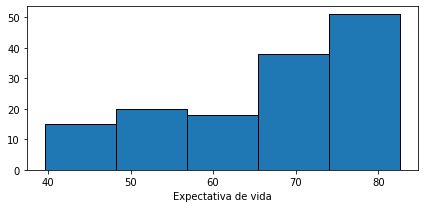

In [3]:
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
counts, bin_edges, artist = ax.hist(df["lifeExp"], bins=5, edgecolor='black')
ax.set_xlabel('Expectativa de vida')
display(counts, bin_edges)

donde `counts` corresponde a los conteos (frecuencias) y `bin_edges` a los límites de los cajones. Notar que para cinco  cajones tendremos seis límites

**Influencia de la cantidad de bines**

A continuación se muestra como cambia el histograma usando distinto número de cajas (`bins`)

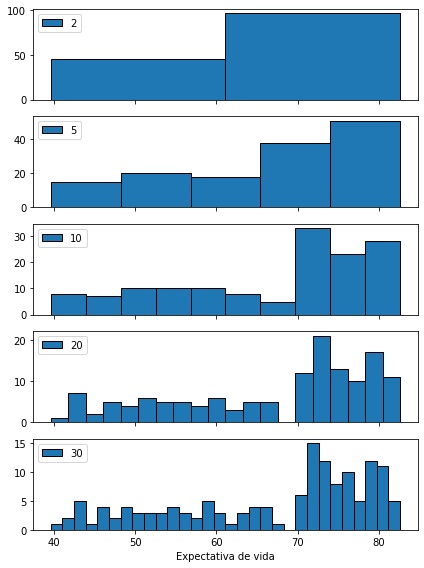

In [4]:
fig, ax = plt.subplots(5, figsize=(6, 8), tight_layout=True, sharex=True)

for k, bins in enumerate([2, 5, 10, 20, 30]):
    ax[k].hist(df["lifeExp"], bins=bins, edgecolor='black', label=f"{bins}")
    ax[k].legend(loc=2)
ax[-1].set_xlabel('Expectativa de vida');

:::{important}

La cantidad de bines (en relación al rango) controla la resolución del histograma

- Utilizar muy pocos bines resultará en pérdida de detalle (bines muy anchos)
- Utilizar demasiados bines resultará en un histograma muy ruidoso (bines muy delgados)

:::

En el ejemplo anterior utilizar dos bines nos da una estimación demasiado gruesa, mientras que usar 30 nos da una estimación demasiado ruidosa. El mejor compromiso parece estar entre 10 y 20

:::{hint}

Usa distintos valores de `bins` y evalua cualitativamente los resultados

:::

Como valor inicial para `bins` se puede utilizar una heurística como la "regla de Silverman", la cual nos da un estimado para el ancho de los bines

$$
\Delta = 0.9 \sigma N^{-1/5}
$$

donde $N$ es la cantidad de datos y $\sigma$ es la desviación estándar de los datos. Si dividimos el rango por el ancho de los bines y luego redondeamos obtenemos

In [5]:
silverman_rule = lambda data: 0.9*np.std(data)*len(data)**(-1/5)
rango = lambda data: np.amax(data) - np.amin(data)

int(np.round(rango(df["lifeExp"])/silverman_rule(df["lifeExp"])))

11

**Interpretación de un histograma**

El histograma revela visualmente algunas propiedades y comportamientos de la distribución de nuestra muestra. Usando un histograma podemos reconocer nuestros datos en alguna de las distribuciones que vimos en la lección anterior

Considere ahora los siguientes ejemplos de histogramas de distribuciones univariadas

<img src="img/stats5.png">

Utilizando el histograma podemos estudiar

- Peso relativo entre la cola izquierda y derecha: Simetría de la distribución
- La cantidad de modas de una distribución: Puede ser una (normal), múltiples o ninguna en particular (uniforme)


**Histograma en dos dimensiones**

La noción de histograma se puede extender al caso de dos variables utilizando cajones (bines) bidimensionales

La función [`hist2d`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist2d.html) de matplotlib construye un histograma en dos dimensiones y lo grafica como un mapa de contornos

A continuación se muestra un histograma de la expectativa de vida (horizontal) y el PIB per cápita (vertical)

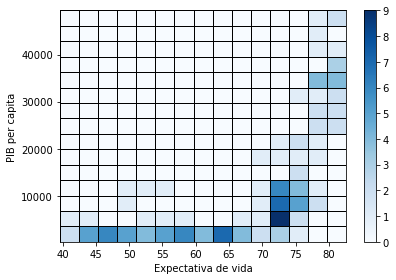

In [6]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
res = ax.hist2d(df["lifeExp"], df["gdpPercap"], bins=15, edgecolor='black', cmap=plt.cm.Blues)
counts, bin_edges_x, bin_edges_y, artist = res
ax.set_xlabel('Expectativa de vida')
ax.set_ylabel('PIB per capita')
fig.colorbar(artist);

donde `counts` corresponde a los conteos (frecuencias) y `bin_edges_x`/`bin_edges_y` corresponde a los límites horizontales y verticales, respectivamente

:::{note}

Con el histograma en dos dimensiones exploramos la **distribución conjunta** de las variables. Esto nos permite revelar correlaciones entre las variables

:::



## Distribución acumulada empírica

Para calcular probabilidades a partir de neustros datos necesitamos su distribución. En general no conocemos la función de masa/densidad subyacente de los datos, pero podemos calcular su **distribución empírica**

Si tengo $n$ datos $X_1, X_2, \ldots, X_n$, su distribución acumulada empírica es

$$
F_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}(X_i < x)
$$

Donde la función indicadora $\mathbb{1}(X_i<x)$ es igual a $1$ si la $X_i<x$ o $0$ en el caso contrario

Si los datos están ordenados entonces sólo tenemos que buscar en que posición se encuentra $x$ y dividir por $n$

Podemos implementarla en NumPy como

In [7]:
def ECDF(data):
    data = np.sort(data)
    n = len(data)
    def result(x):
        return np.searchsorted(data, x, side='right')/n
    return result

**Ejemplo**

¿Cuál es la probabilidad de seleccionar al azar un país que tenga expectativa de vida menor a 80 años? 

In [8]:
ECDF(df["lifeExp"])(80)

0.9084507042253521

¿Cuál es la probabilidad de seleccionar al azar país que tenga expectativa de vida mayor a 60 años? 

In [9]:
1. - ECDF(df["lifeExp"])(60)

0.6971830985915493

¿Cuál es la probabilidad de seleccionar al azar país que tenga expectativa de vida entre 60 y 80 años? 

In [10]:
ECDF(df["lifeExp"])(80) - ECDF(df["lifeExp"])(60)

0.6056338028169015

## Descriptores de la distribución

Visualizar la distribución nos da mucha información. Pero en algunos casos sólo interesa comprobar la existencia de ciertas características o atributos de la distribución

> Podemos resumir una distribución en función de sus **momentos**

Cada momento describe una propiedad en particular

- Primer momento o media: Describe donde está localizada la distribución
- Segundo momento o varianza: Describe el ancho o dispersión de la distribución
- Tercer momento o simetría (skewness): Indica si la distribución es más pesada hacia la izquierda o hacia la derecha
- Cuarto momento o curtosis (kurtosis): Indica si la distribución es picuda o plana

La siguiente figura esquematiza las influencia de los momentos

<img src="https://images.deepai.org/django-summernote/2019-07-02/4d0a6ff1-8b53-4537-9d0a-919993d10024.png" width="500">

También podemos describir una distribución en función de la

- Moda: Valor más repetido
- Mediana: Valor central
- Diferencias entre percentiles

**Calculando descriptores con `pandas` y `scipy`**

Los dataframe tienen un método llamado [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) que retorna la media, la desviación estándar y los percentiles de los atributos

In [11]:
df.describe()

,lifeExp,pop,gdpPercap
count,142.000000,1.420000e+02,142.000000
mean,67.007423,4.402122e+07,11680.071820
std,12.073021,1.476214e+08,12859.937337
min,39.613000,1.995790e+05,277.551859
25%,57.160250,4.508034e+06,1624.842248
50%,71.935500,1.051753e+07,6124.371108
75%,76.413250,3.121004e+07,18008.835640
max,82.603000,1.318683e+09,49357.190170


También podemos utilizar la función [`describe`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html#scipy.stats.describe) de scipy.stats 

In [12]:
res = scipy.stats.describe(df[["lifeExp", "gdpPercap"]])

El objeto retornado tiene atributos

- `nobs`: Número de observaciones
- `minmax`: Tuplas con valor mínimo y máximo
- `mean`: Primer momento
- `variance`: Segundo momento
- `skewness`: Tercer momento
- `kurtosis`: Cuarto momento

Por ejemplo la simetría de las variables consultadas:

In [13]:
res.skewness

array([-0.6814798 ,  1.21122788])

Finalmente, si necesitamos un momento en particular, podemos utilizar [`moment`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moment.html) de scipy.stats

In [14]:
scipy.stats.moment(df["lifeExp"], moment=5)

-739409.7609087641